# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 깨짐 문제 해결용
from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False
path = "C:\Windows\Fonts\H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)

# 1. Data

In [3]:
df = pd.read_csv("data/processed/labeled_data_RG3.csv", parse_dates=True)

In [4]:
df.set_index("TimeStamp", inplace=True)

In [5]:
df.head()

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-21 00:57:37,5f8f87c09c0189cc6679187a,2020-10-21,17,"RG3 MOLD'G W/SHLD, LH",0,None,1.06,0.93,13.01,61.779999,...,60.299999,286.000000,285.000000,285.0,275.399994,265.100006,234.899994,65.800003,21.6,22.5
2020-10-21 00:57:37,5f8f87c09c0189cc6679187d,2020-10-21,18,"RG3 MOLD'G W/SHLD, RH",0,None,1.06,0.93,13.01,61.779999,...,60.299999,286.000000,285.000000,285.0,275.399994,265.100006,234.899994,65.800003,21.6,22.5
2020-10-21 00:56:34,5f8f87c09c0189cc66791885,2020-10-21,17,"RG3 MOLD'G W/SHLD, LH",0,None,1.06,0.93,12.99,61.779999,...,60.500000,286.200012,285.799988,285.0,275.600006,265.600006,234.800003,65.800003,21.5,22.5
2020-10-21 00:56:34,5f8f87c19c0189cc66791888,2020-10-21,18,"RG3 MOLD'G W/SHLD, RH",0,None,1.06,0.93,12.99,61.779999,...,60.500000,286.200012,285.799988,285.0,275.600006,265.600006,234.800003,65.800003,21.5,22.5
2020-10-21 00:55:34,5f8f87c29c0189cc6679188e,2020-10-21,17,"RG3 MOLD'G W/SHLD, LH",0,None,1.06,0.93,12.95,61.759998,...,60.200001,286.500000,285.100006,285.0,276.000000,265.100006,234.699997,65.900002,21.5,22.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 2020-10-21 00:57:37 to 2020-11-06 04:27:38
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       1256 non-null   object 
 1   PART_FACT_PLAN_DATE       1256 non-null   object 
 2   PART_FACT_SERIAL          1256 non-null   int64  
 3   PART_NAME                 1256 non-null   object 
 4   PassOrFail                1256 non-null   int64  
 5   Reason                    1256 non-null   object 
 6   Injection_Time            1256 non-null   float64
 7   Filling_Time              1256 non-null   float64
 8   Plasticizing_Time         1256 non-null   float64
 9   Cycle_Time                1256 non-null   float64
 10  Clamp_Close_Time          1256 non-null   float64
 11  Cushion_Position          1256 non-null   float64
 12  Switch_Over_Position      1256 non-null   float64
 13  Plasticizing_Position     1256 non-

In [7]:
df.nunique()

_id                         1256
PART_FACT_PLAN_DATE            6
PART_FACT_SERIAL               9
PART_NAME                      2
PassOrFail                     2
Reason                         3
Injection_Time                 4
Filling_Time                   4
Plasticizing_Time             38
Cycle_Time                    12
Clamp_Close_Time               3
Cushion_Position               9
Switch_Over_Position           2
Plasticizing_Position         11
Clamp_Open_Position            1
Max_Injection_Speed           15
Max_Screw_RPM                  5
Average_Screw_RPM              5
Max_Injection_Pressure        17
Max_Switch_Over_Pressure      33
Max_Back_Pressure             28
Average_Back_Pressure         32
Barrel_Temperature_1          25
Barrel_Temperature_2          22
Barrel_Temperature_3          17
Barrel_Temperature_4          30
Barrel_Temperature_5          21
Barrel_Temperature_6          12
Hopper_Temperature            53
Mold_Temperature_3            26
Mold_Tempe

In [8]:
df.head()

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-21 00:57:37,5f8f87c09c0189cc6679187a,2020-10-21,17,"RG3 MOLD'G W/SHLD, LH",0,None,1.06,0.93,13.01,61.779999,...,60.299999,286.000000,285.000000,285.0,275.399994,265.100006,234.899994,65.800003,21.6,22.5
2020-10-21 00:57:37,5f8f87c09c0189cc6679187d,2020-10-21,18,"RG3 MOLD'G W/SHLD, RH",0,None,1.06,0.93,13.01,61.779999,...,60.299999,286.000000,285.000000,285.0,275.399994,265.100006,234.899994,65.800003,21.6,22.5
2020-10-21 00:56:34,5f8f87c09c0189cc66791885,2020-10-21,17,"RG3 MOLD'G W/SHLD, LH",0,None,1.06,0.93,12.99,61.779999,...,60.500000,286.200012,285.799988,285.0,275.600006,265.600006,234.800003,65.800003,21.5,22.5
2020-10-21 00:56:34,5f8f87c19c0189cc66791888,2020-10-21,18,"RG3 MOLD'G W/SHLD, RH",0,None,1.06,0.93,12.99,61.779999,...,60.500000,286.200012,285.799988,285.0,275.600006,265.600006,234.800003,65.800003,21.5,22.5
2020-10-21 00:55:34,5f8f87c29c0189cc6679188e,2020-10-21,17,"RG3 MOLD'G W/SHLD, LH",0,None,1.06,0.93,12.95,61.759998,...,60.200001,286.500000,285.100006,285.0,276.000000,265.100006,234.699997,65.900002,21.5,22.5


# EDA

In [9]:
numerical_features = [x for x in df.columns if np.dtype(df[x]) == 'float64']
categorical_features = (set(df.columns.tolist()) - 
                        set(numerical_features) - 
                        set(['_id', 'PART_NAME', 'PassOrFail', 'Reason']))

In [10]:
categorical_features

{'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL'}

In [11]:
pass_df = df.query("PassOrFail == 0")
fail_df = df.query("PassOrFail == 1")

## Categorical Features

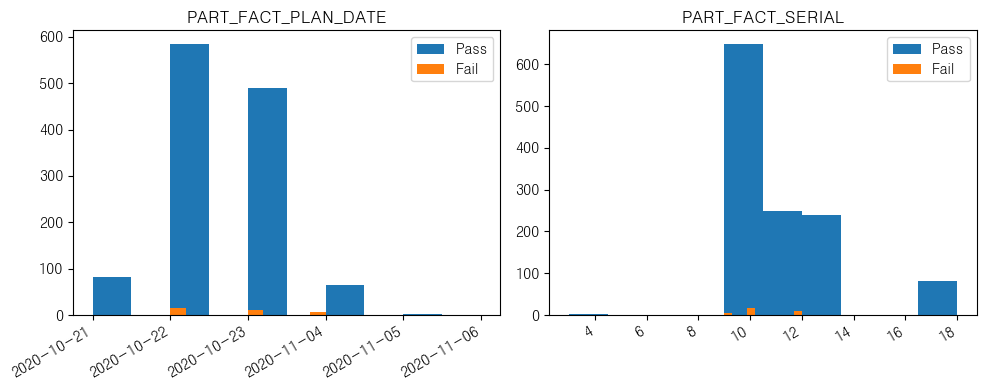

In [12]:
fig, axs = plt.subplots(figsize=(10, 4), ncols=2)

for i, feat in enumerate(categorical_features):
    axs[i].hist(pass_df[f"{feat}"], label="Pass", bins=10)
    axs[i].hist(fail_df[f"{feat}"], label="Fail", bins=10)
    axs[i].set_title(f"{feat}")
    axs[i].legend()
fig.autofmt_xdate()
plt.tight_layout()
plt.show();

- Categorical Feature와 관련해서는 합격품과 불량품 간 특별한 차이를 찾지 못하였음

## Numerical Features

In [13]:
len(numerical_features)

25

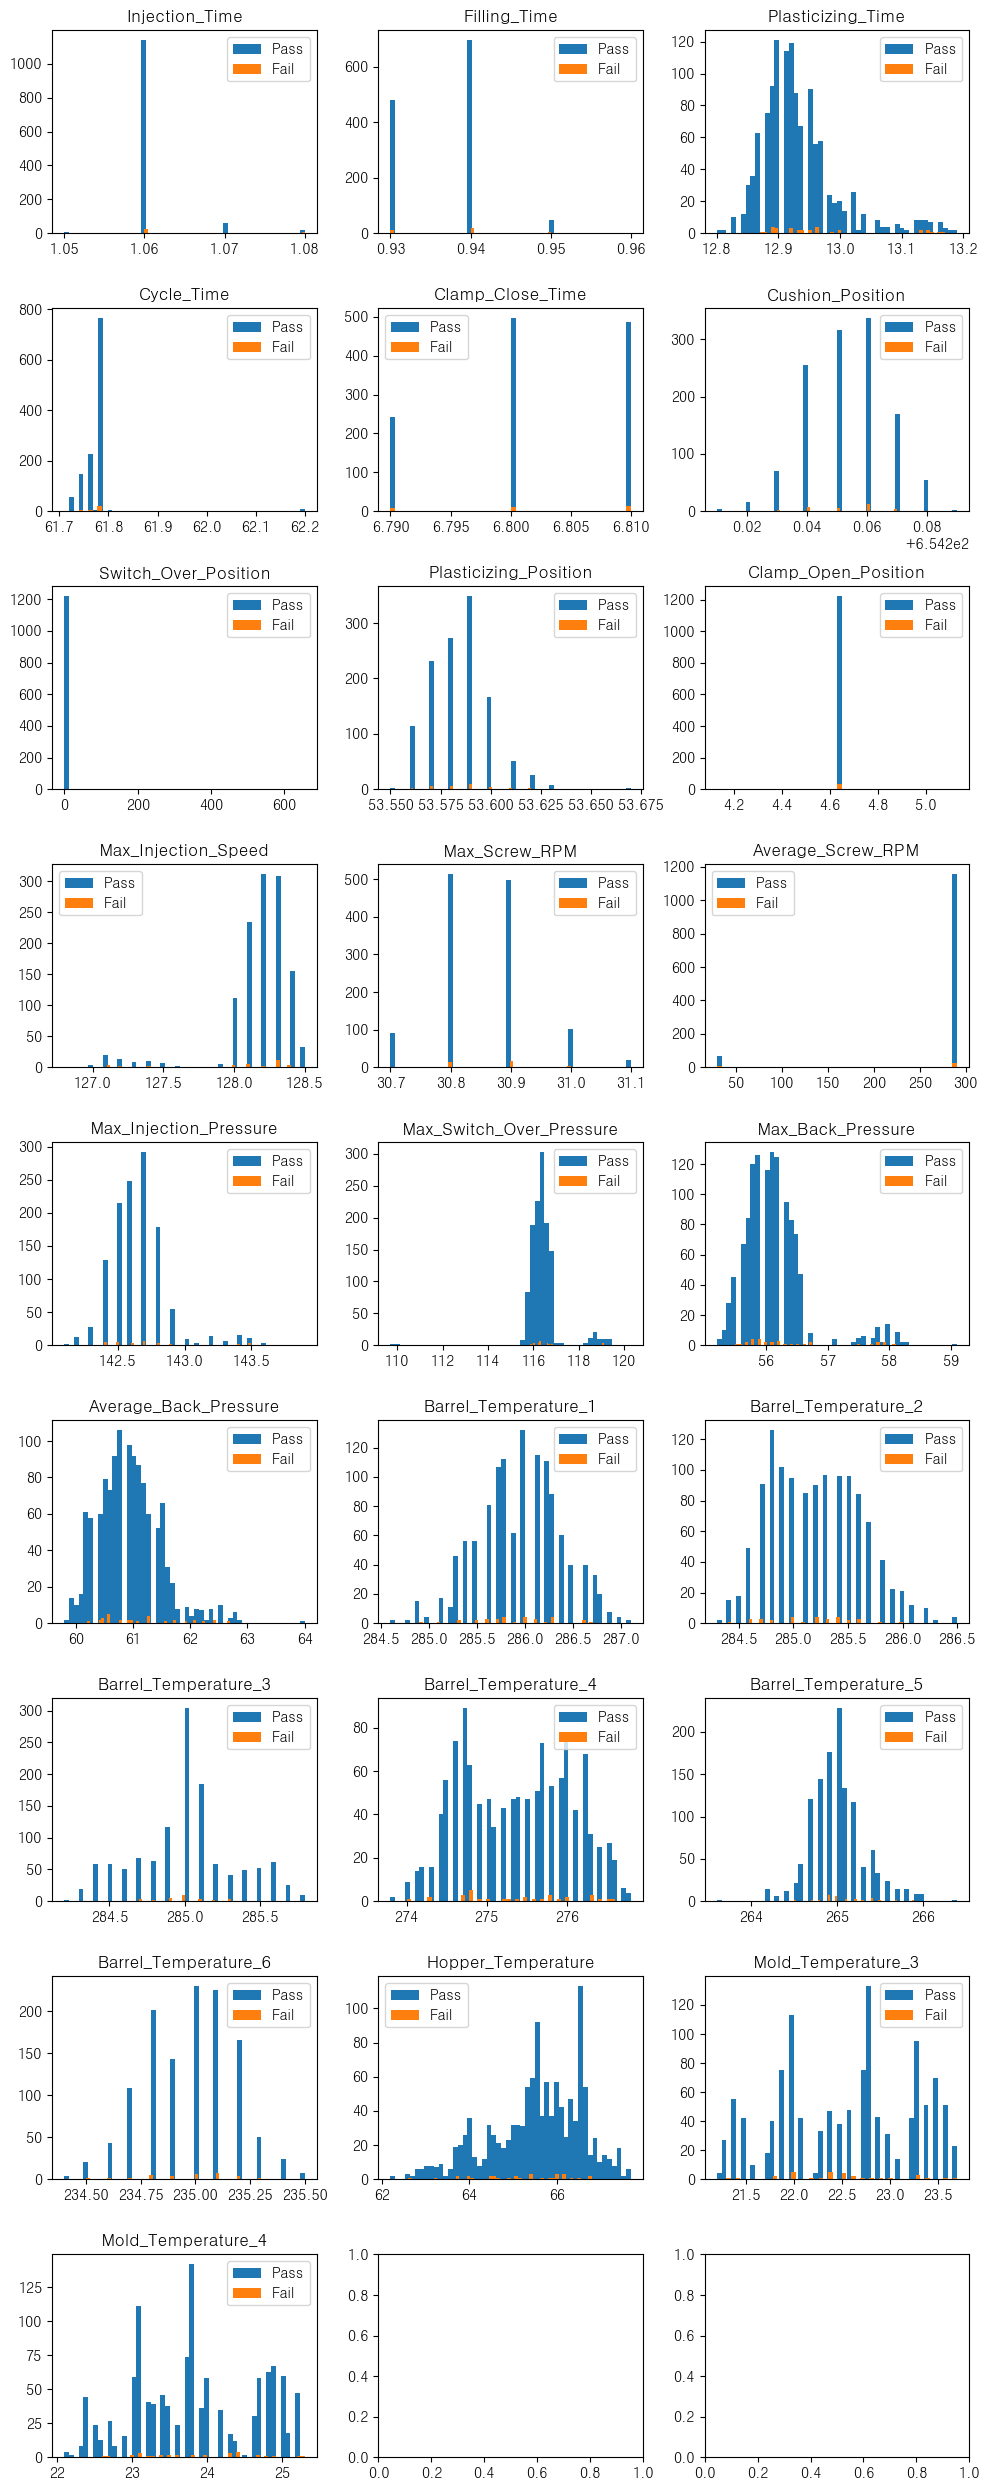

In [14]:
fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3)

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(pass_df[f"{feat}"], label="Pass", bins=50)
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
#fig.autofmt_xdate()
plt.tight_layout()
plt.show();

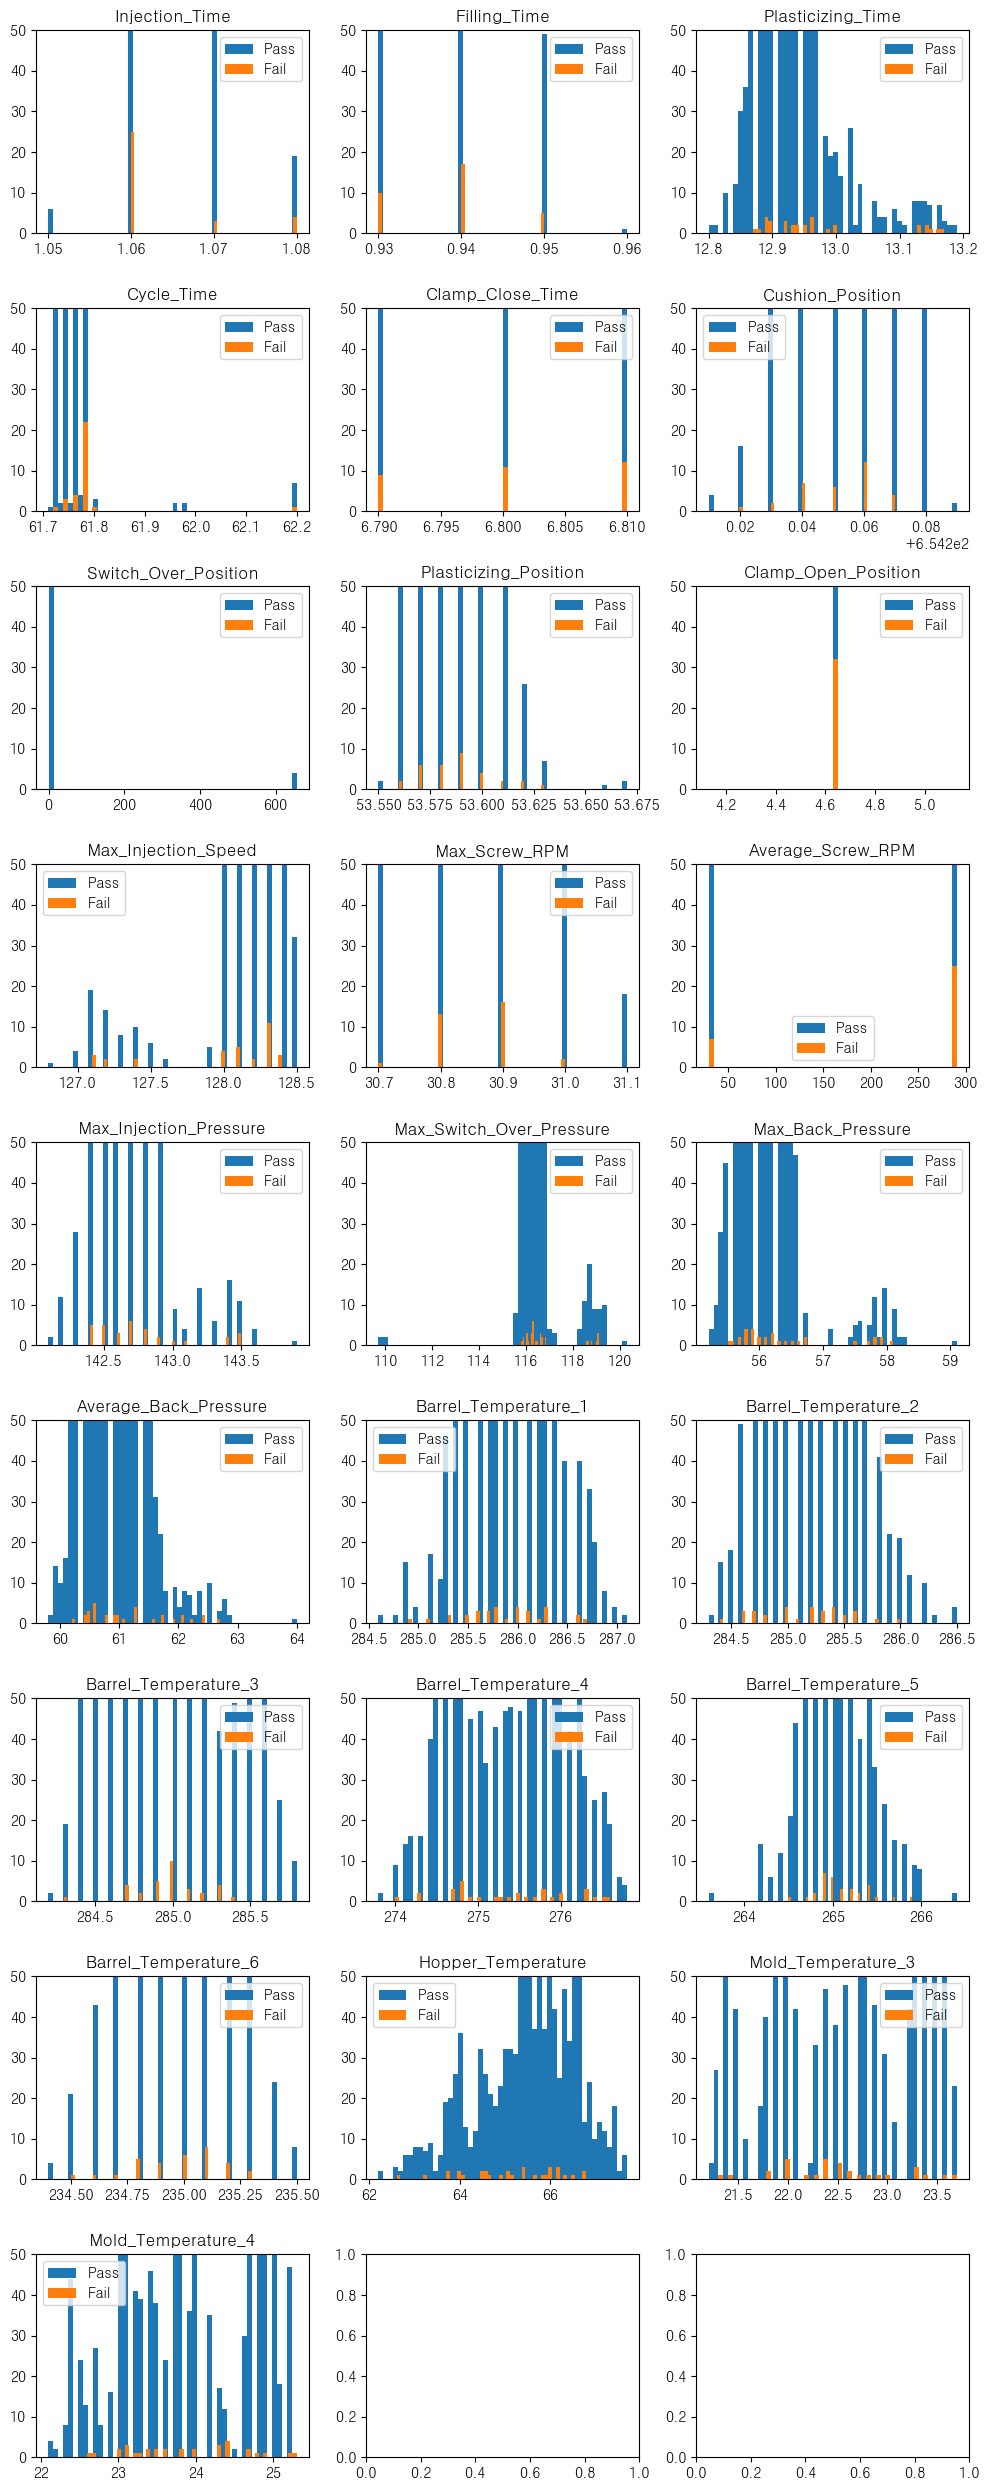

In [15]:
# Y-Axis 범위 조정

fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3, )

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(pass_df[f"{feat}"], label="Pass", bins=50)
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].set_ylim(0, 50)
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
#fig.autofmt_xdate()
plt.tight_layout()
plt.show();

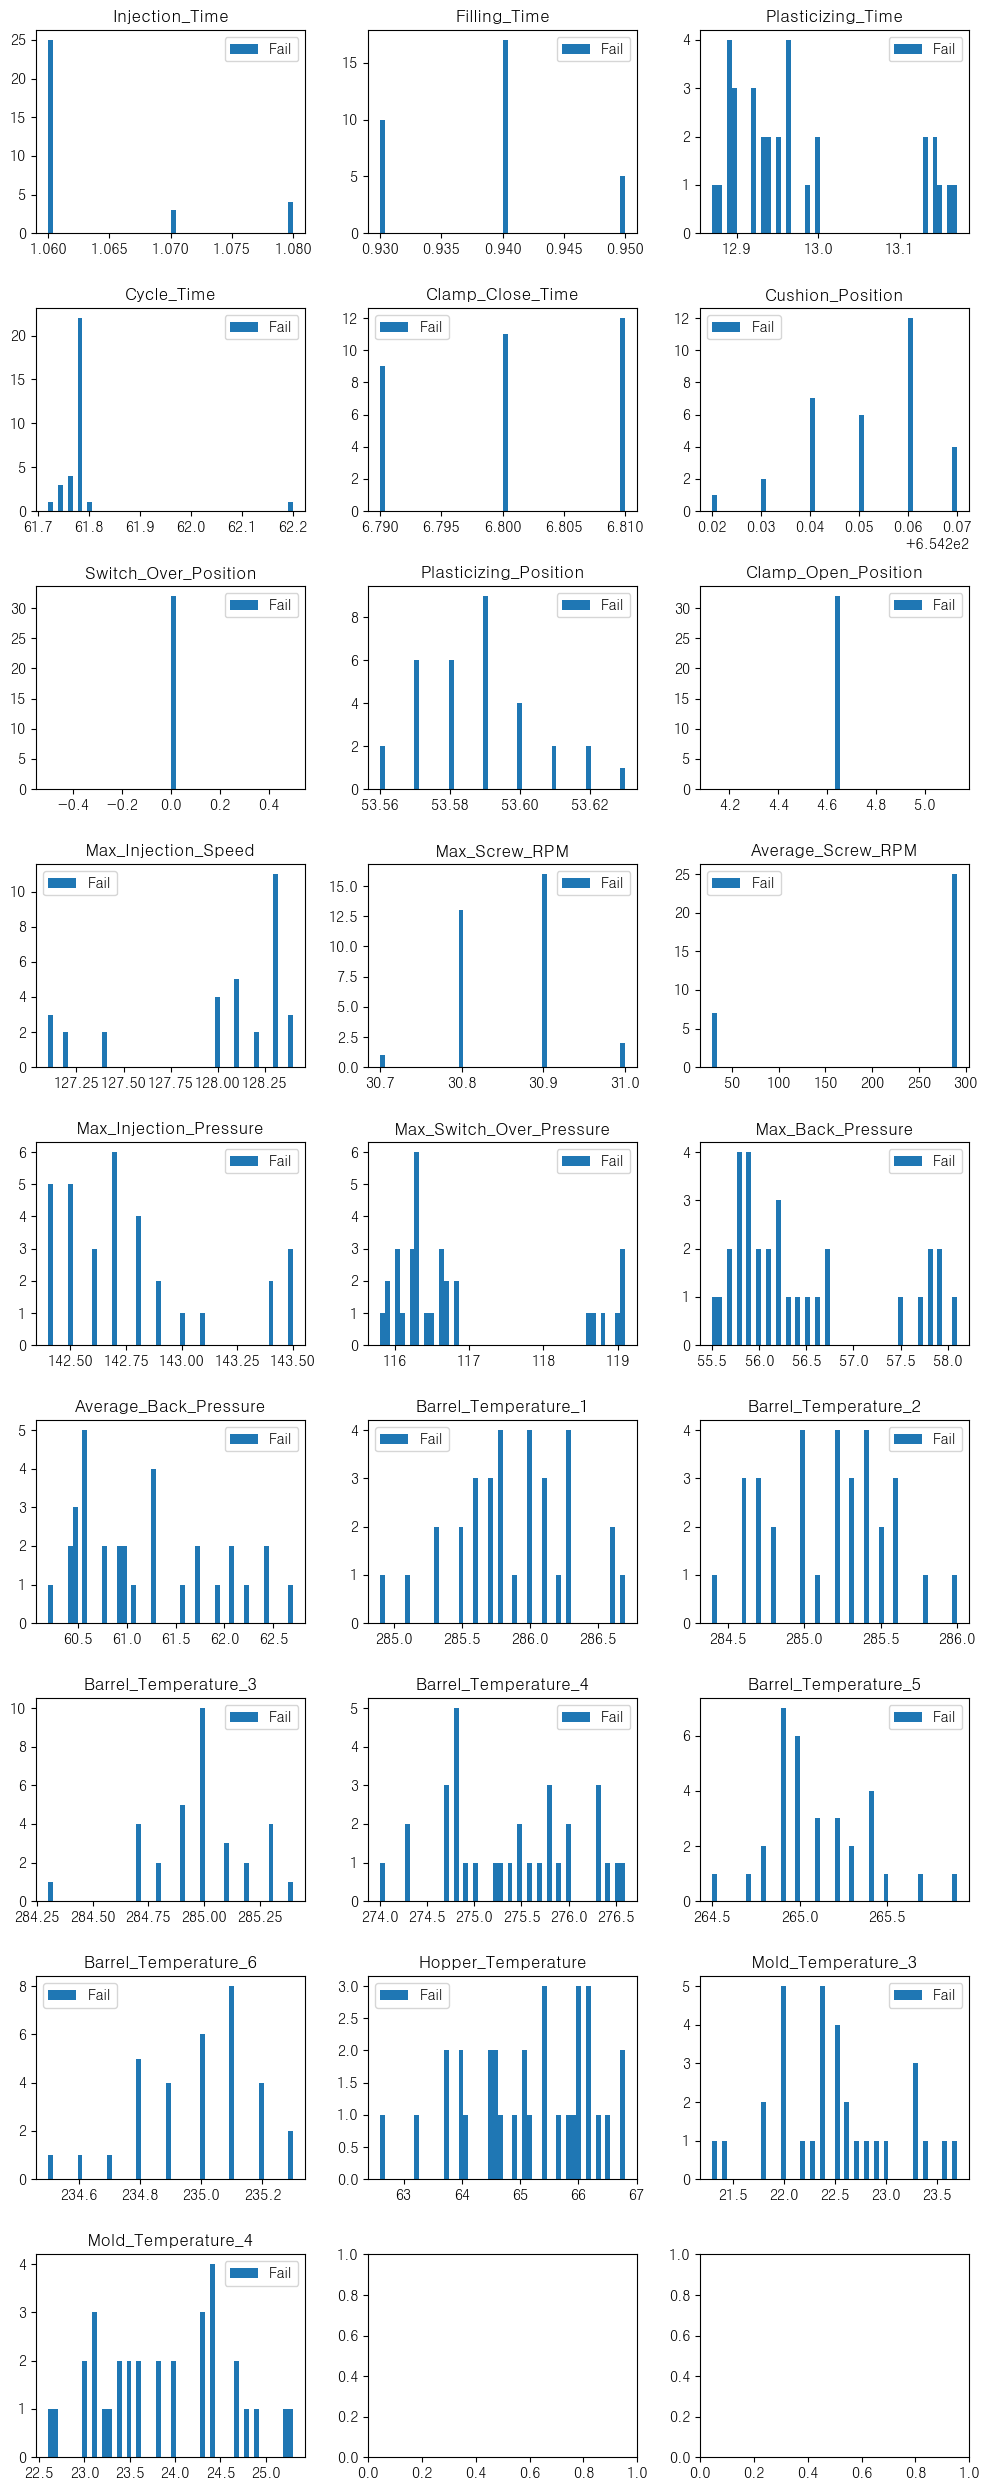

In [16]:
# Fail Only

fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3)

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
#fig.autofmt_xdate()
plt.tight_layout()
plt.show();

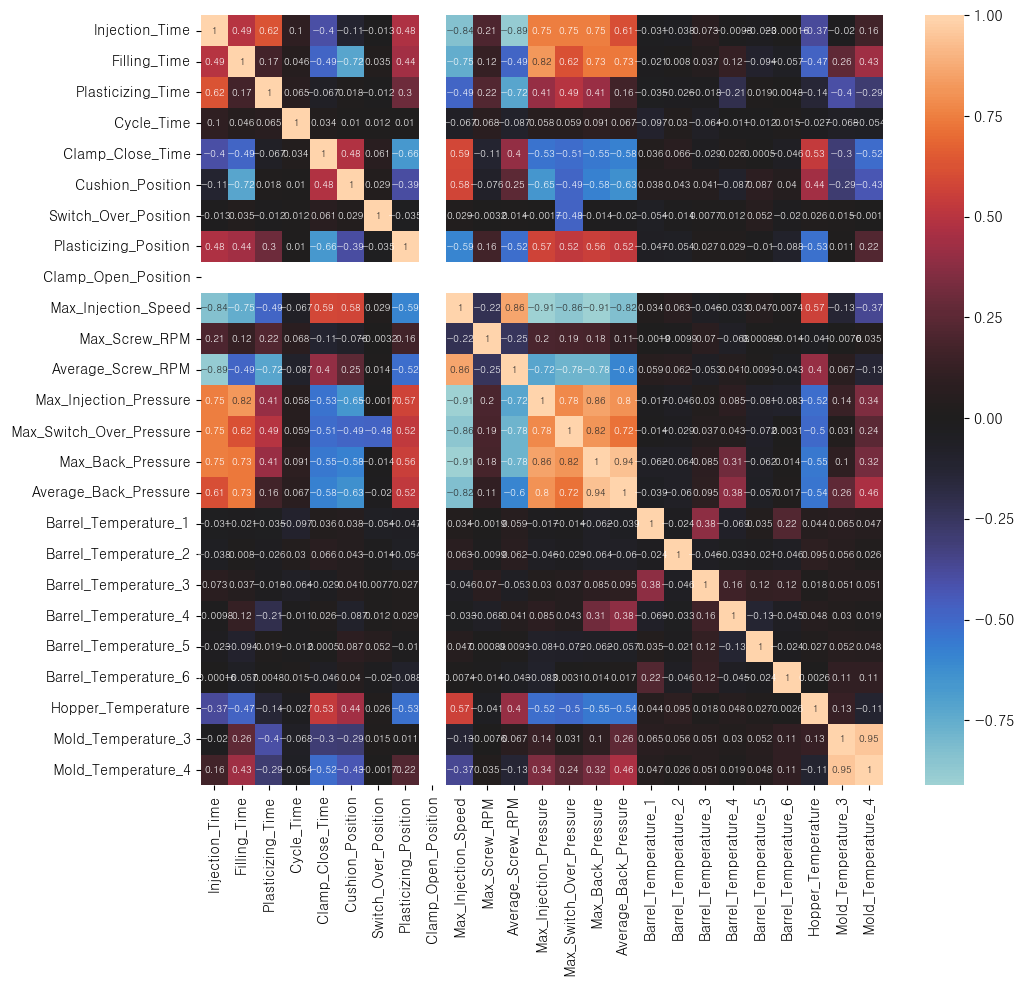

In [17]:
f, ax = plt.subplots(figsize=(11, 10))

sns.heatmap(
    df[numerical_features].corr(method='pearson'),
    center=0,
    annot=True,
    annot_kws={"size": 7}
);

- Numerical Feature의 경우 `Clamp_Close_Time`, `Cushion_Position`, `Switch_Over_Position`, `Clamp_Open_Position`, `Barrel_Temperature_1`, `Barrel_Temperature_2`, `Barrel_Temperature_3`, `Barrel_Temperature_4`, `Barrel_Temperature_5`, `Barrel_Temperature_6` 은 영향이 적다 판단됨

# Features 도출

In [18]:
drop_features = (
    list(categorical_features) + 
    [
        "Clamp_Close_Time", "Cushion_Position", "Switch_Over_Position", "Clamp_Open_Position", 
        "Barrel_Temperature_1", "Barrel_Temperature_2", "Barrel_Temperature_3", "Barrel_Temperature_4", 
        "Barrel_Temperature_5", "Barrel_Temperature_6"
    ] +
    ["PART_NAME"]
)

In [19]:
final_columns = set(df.columns.tolist()) - set(drop_features)

In [20]:
df = df[list(final_columns)].copy()

In [21]:
df

,Plasticizing_Time,Max_Screw_RPM,Filling_Time,Mold_Temperature_3,Injection_Time,Mold_Temperature_4,Reason,Max_Back_Pressure,_id,Hopper_Temperature,Max_Switch_Over_Pressure,PassOrFail,Max_Injection_Pressure,Cycle_Time,Plasticizing_Position,Max_Injection_Speed,Average_Back_Pressure,Average_Screw_RPM
TimeStamp,,,,,,,,,,,,,,,,,,
2020-10-21 00:57:37,13.01,30.900000,0.93,21.600000,1.06,22.500000,None,55.599998,5f8f87c09c0189cc6679187a,65.800003,115.699997,0,142.300003,61.779999,53.560001,128.500000,60.299999,290.500000
2020-10-21 00:57:37,13.01,30.900000,0.93,21.600000,1.06,22.500000,None,55.599998,5f8f87c09c0189cc6679187d,65.800003,115.699997,0,142.300003,61.779999,53.560001,128.500000,60.299999,290.500000
2020-10-21 00:56:34,12.99,30.900000,0.93,21.500000,1.06,22.500000,None,55.700001,5f8f87c09c0189cc66791885,65.800003,115.800003,0,142.399994,61.779999,53.580002,128.500000,60.500000,290.500000
2020-10-21 00:56:34,12.99,30.900000,0.93,21.500000,1.06,22.500000,None,55.700001,5f8f87c19c0189cc66791888,65.800003,115.800003,0,142.399994,61.779999,53.580002,128.500000,60.500000,290.500000
2020-10-21 00:55:34,12.95,30.900000,0.93,21.500000,1.06,22.500000,None,55.799999,5f8f87c29c0189cc6679188e,65.900002,116.000000,0,142.500000,61.759998,53.560001,128.399994,60.200001,290.700012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04 05:43:29,13.12,31.100000,0.94,22.500000,1.07,24.299999,None,57.099998,5fa23fbc9c0189cc66e44ddf,64.500000,118.300003,0,143.000000,61.779999,53.610001,127.500000,61.500000,29.000000
2020-11-04 05:43:29,13.12,31.100000,0.94,22.500000,1.07,24.299999,None,57.099998,5fa23fbd9c0189cc66e44de3,64.500000,118.300003,0,143.000000,61.779999,53.610001,127.500000,61.500000,29.000000
2020-11-05 03:00:02,12.96,30.900000,0.94,22.299999,1.07,23.700001,None,56.200001,5fa36afd9c0189cc66eebe41,62.200001,117.199997,0,142.899994,61.779999,53.669998,128.000000,60.599998,29.000000


In [22]:
df.to_csv("data/processed/labeled_data_RG3_1.csv", index=True)

# 추가 분석

In [23]:
pass_df[list(final_columns)].describe().loc[["mean", "std"], :]

,Plasticizing_Time,Max_Screw_RPM,Filling_Time,Mold_Temperature_3,Injection_Time,Mold_Temperature_4,Max_Back_Pressure,Hopper_Temperature,Max_Switch_Over_Pressure,PassOrFail,Max_Injection_Pressure,Cycle_Time,Plasticizing_Position,Max_Injection_Speed,Average_Back_Pressure,Average_Screw_RPM
mean,12.932533,30.854411,0.936511,22.568219,1.060735,23.823203,56.122059,65.522549,116.402124,0.0,142.653677,61.771413,53.584347,128.169281,60.936438,276.211603
std,0.063544,0.080758,0.005589,0.685365,0.003302,0.809581,0.514566,1.053460,0.751588,0.0,0.219424,0.038799,0.015019,0.255030,0.534955,59.513747


In [24]:
fail_df[list(final_columns)].describe().loc[["mean", "std"], :]

,Plasticizing_Time,Max_Screw_RPM,Filling_Time,Mold_Temperature_3,Injection_Time,Mold_Temperature_4,Max_Back_Pressure,Hopper_Temperature,Max_Switch_Over_Pressure,PassOrFail,Max_Injection_Pressure,Cycle_Time,Plasticizing_Position,Max_Injection_Speed,Average_Back_Pressure,Average_Screw_RPM
mean,12.976875,30.859375,0.938437,22.500000,1.063437,23.868750,56.437500,65.159375,116.881250,1.0,142.778124,61.785624,53.588125,127.996876,61.187500,233.325002
std,0.096768,0.066524,0.006773,0.595683,0.007007,0.735039,0.801108,1.070381,1.126638,0.0,0.348022,0.077416,0.017308,0.441029,0.697345,109.848650


In [25]:
# Just to extract the final features for the boxplot

final_features = [
    'Plasticizing_Position', 'Average_Back_Pressure', 'Max_Switch_Over_Pressure', 
    'Cycle_Time', 'Injection_Time', 'Max_Injection_Speed', 'Max_Screw_RPM', 
    'Mold_Temperature_4', 'Plasticizing_Time', 'Filling_Time', 'Hopper_Temperature', 
    'Mold_Temperature_3', 'Max_Back_Pressure', 'Max_Injection_Pressure', 'Average_Screw_RPM'
]

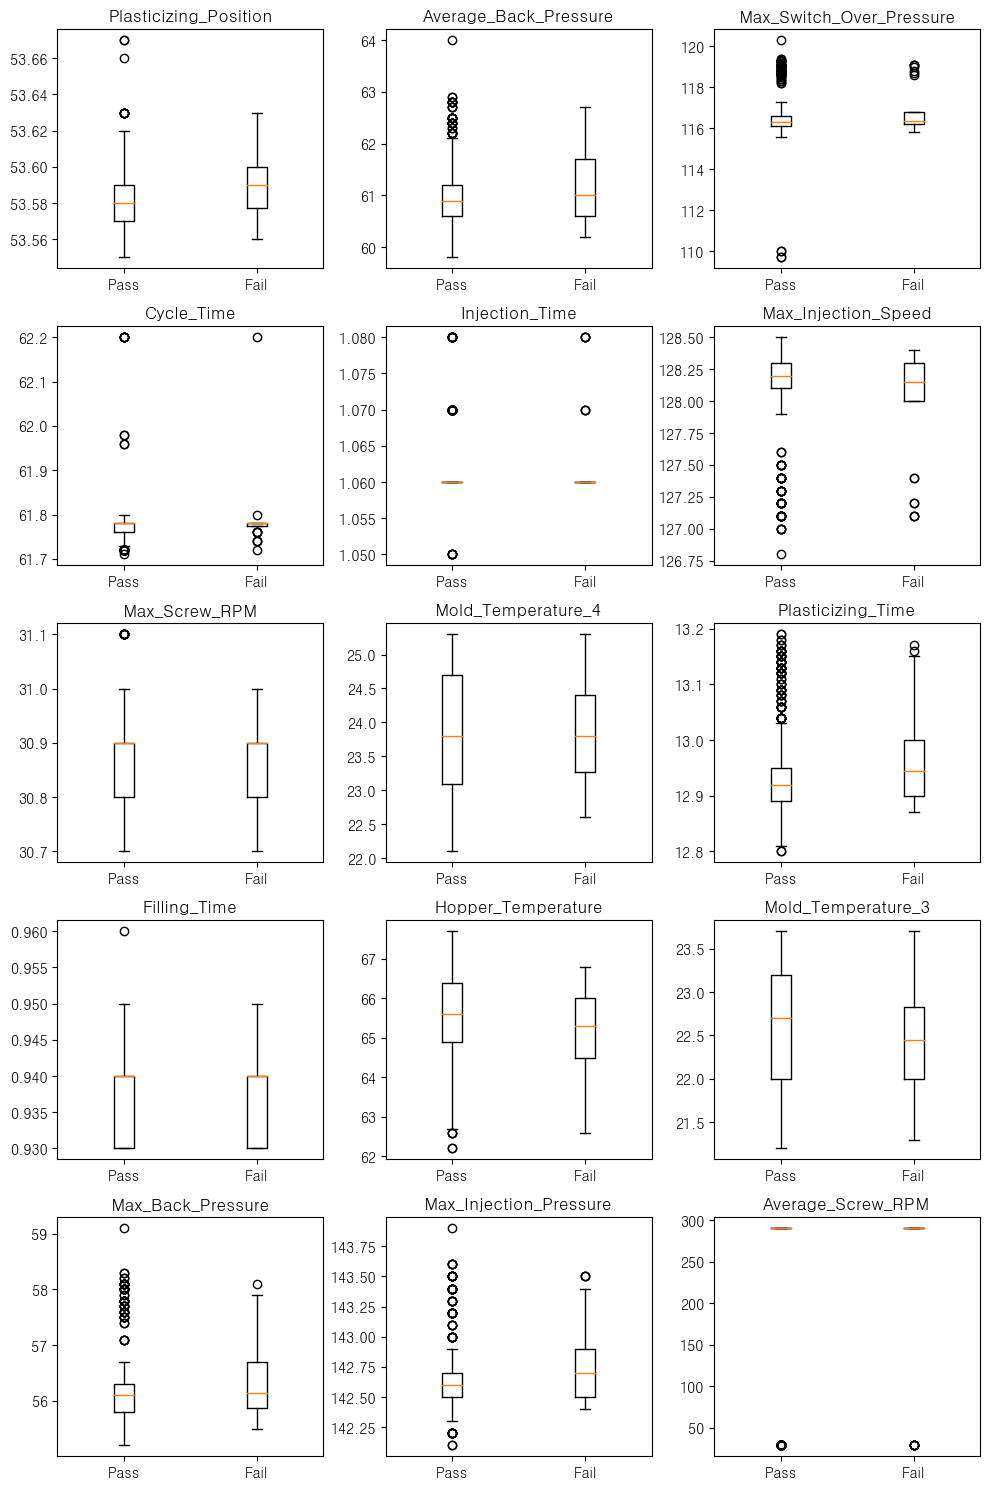

In [26]:
fig, axs = plt.subplots(figsize=(10, 15), nrows=5, ncols=3)

r = 0
c = 0
for i, feat in enumerate(list(final_features)):
    axs[r, c].boxplot(
        [pass_df[f"{feat}"], fail_df[f"{feat}"]], 
        #positions=[1, 3],
        labels=["Pass", "Fail"]
    )
    axs[r, c].set_title(f"{feat}")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
#fig.autofmt_xdate()
plt.tight_layout()
plt.show();